In [1]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
import pathlib
#Local Functions/the subtraction algorithm
from hydrogenase_processing.vaporfit import atm_subtraction, AtmFitParams
from hydrogenase_processing.remove_wv import subtract_wv

In [3]:
#Paths to Local Data
path_to_hyd2_dark_titration_raw_data = pathlib.Path("../data/opus_files/hyd2_dark_titration_examples")
path_to_water_vapor_data = pathlib.Path("../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../data/output_plots/")


In [4]:
#Reading in hydrogenase reaction and reference water vapor spectrums
opus_data = read_file(f'{path_to_hyd2_dark_titration_raw_data}''/011a as iso Hyd2 dark titration 0 mV.0022')
wv_data = read_file(f'{path_to_water_vapor_data}''/water vapor 4cm-1.1')

In [5]:
#Viewing the Imported Reaction data and all the different attributes
opus_data
print(f'Parsed fields: '
      f'{list(opus_data.keys())}')
print(opus_data["AB"])
print(opus_data["AB"].size)


Parsed fields: ['Text Information', 'Optik', 'Fourier Transformation', 'Acquisition', 'Sample', 'IgSm', 'IgSm Data Parameter', 'PhSm', 'ScSm', 'AB', 'Instrument (Rf)', 'Optik (Rf)', 'Acquisition (Rf)', 'Fourier Transformation (Rf)', 'IgRf', 'IgRf Data Parameter', 'ScRf Data Parameter', 'ScRf', 'AB Data Parameter', 'ScSm Data Parameter', 'PhSm Data Parameter', 'Instrument', 'History']
[0.35745895 0.34189048 0.34533197 ... 0.17837155 0.63315809 0.        ]
1816


In [7]:
print(opus_data[''])

{'Text Information': '4\x00\x00x\x00\x00\x00\x18\x00\x00\x00`\x00\x00\x00:\x00\x00\x00ø\x01\x00\x00@\x00\x00\x00\x1e\x00\x00\x00à\x02\x00\x000\x00\x00\x002\x00\x00\x00X\x03\x00\x00\xa0\x00\x00\x00B\x00\x00\x00 \x04\x00\x00\x07\x08\x00\x00\x88;\x00\x00(\x05\x00\x00\x17\x08\x00\x002\x00\x00\x00Hó\x00\x00\x07\x0c\x00\x00\x00\x04\x00\x00\x10ô\x00\x00\x07\x04\x00\x00\x18\x07\x00\x00\x80\x04\x01\x00\x0f\x10\x00\x00\x18\x07\x00\x00P!\x01\x00(\x00\x00\x00\x98\x00\x00\x00 >\x01\x00h\x00\x00\x00N\x00\x00\x00\x80@\x01\x008\x00\x00\x00R\x00\x00\x00¸A\x01\x00H\x00\x00\x00\x1e\x00\x00\x00\x00C\x01\x00\x0b\x08\x00\x00\x88;\x00\x00xC\x01\x00\x1b\x08\x00\x002\x00\x00\x00\x981\x02\x00\x1b\x04\x00\x00,\x00\x00\x00`2\x02\x00\x0b\x04\x00\x00\x1e\x07\x00\x00\x103\x02\x00\x1f\x10\x00\x00,\x00\x00\x00\x90Z\x02\x00\x17\x04\x00\x00,\x00\x00\x00@[\x02\x00\x17\x0c\x00\x00,\x00\x00\x00ð[\x02\x00 \x00\x00\x00\x96\x00\x00\x00\xa0\\\x02\x00\x00\x00h@¬\x04\x00\x00ø^\x02', 'Optik': {'APT': '6 mm', 'BMS': 'KBr-Broadband

In [6]:
#Viewing the Reference Water Vapor data
wv_data
print(f'Parsed fields: '
      f'{list(wv_data.keys())}')
print(wv_data["AB"].size)


Parsed fields: ['Text Information', 'Optik', 'Fourier Transformation', 'Acquisition', 'Sample', 'ScSm', 'AB', 'Instrument (Rf)', 'Optik (Rf)', 'Acquisition (Rf)', 'Fourier Transformation (Rf)', 'ScRf Data Parameter', 'ScRf', 'AB Data Parameter', 'ScSm Data Parameter', 'Instrument', 'History']
1556


Absorption spectrum range: 3997.914111328125 499.49819335937497
Absorption elements num: 1816
[3997.91411133 3995.98660944 3994.05910756 ...  503.35319713  501.42569524
  499.49819336]
[0.35745895 0.34189048 0.34533197 ... 0.17837155 0.63315809 0.        ]
Plotting AB


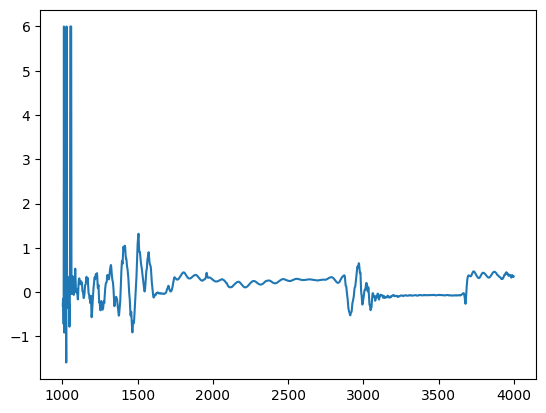

In [8]:
#Extracting the wavenumbers from the reaction data
ab_x = opus_data.get_range("AB")
# the "AB" data can contain more null values at the end (at least 1)
# so the getting useful data requires slicing the array:
abs = opus_data["AB"][0:len(ab_x)]
print(f"Absorption spectrum range: " f"{ab_x[0]} {ab_x[-1]}")
print(f"Absorption elements num: " f'{len(abs)}')
print(ab_x)
print(abs)
#Plotting wavenumbers and absorbance
print("Plotting AB")
plt.plot(ab_x[0:1555], abs[0:1555])
plt.show()



Absorption spectrum range: 3997.757387280464 998.9572246074677
Absorption elements num: 1556
[3997.75738728 3995.82889843 3993.90040958 ... 1002.81420231 1000.88571346
  998.95722461]
[-0.0005095  -0.0005639  -0.0006707  ...  0.00113199  0.00108985
  0.00105354]
Plotting Water Vapor


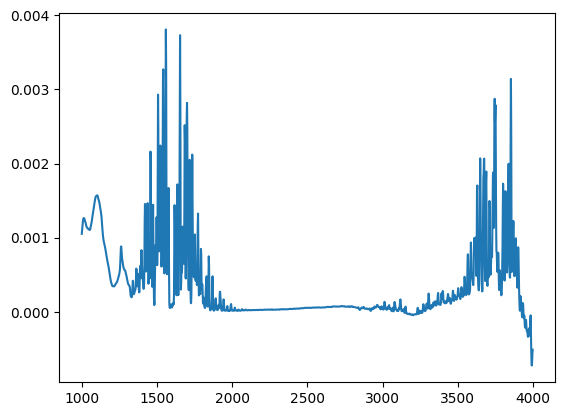

In [10]:

#Extracting the wavenumbers from the water vapor data
wv_x = wv_data.get_range("AB")
# the "AB" data can contain more null values at the end (at least 1)
# so the getting useful data requires slicing the array:
wv_abs = wv_data["AB"][0:len(wv_x)]
print(f"Absorption spectrum range: " f"{wv_x[0]} {wv_x[-1]}")
print(f"Absorption elements num: " f'{len(wv_abs)}')
print(wv_x)
print(wv_abs)
print("Plotting Water Vapor")
plt.plot(wv_x, wv_abs)
plt.show()


Plotting interpolated AB


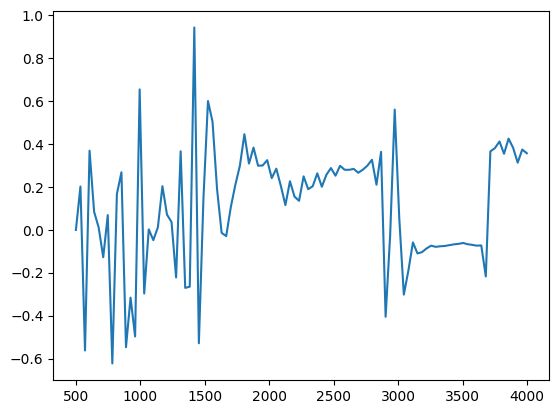

In [11]:

print("Plotting interpolated AB")
interpolated_hydrogenase_data = opus_data.interpolate(ab_x[0], ab_x[-1], 100)

plt.plot(*interpolated_hydrogenase_data)
plt.show()


Plotting interpolated WV


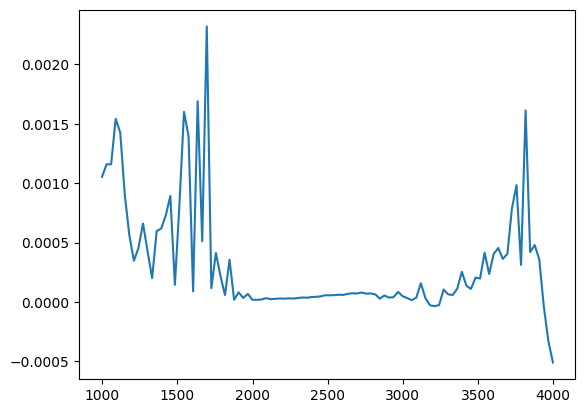

In [12]:
print("Plotting interpolated WV")
interpolated_wv_data = wv_data.interpolate(wv_x[0], wv_x[-1], 100)
plt.plot(*interpolated_wv_data)
plt.show()


In [14]:
#Water Vapor Sub
##Preparing the data for the subtraction algorithm
### Pulling Out Hydrogenase Wave Numbers and Absorbance
hydrogenase_wavenb = interpolated_hydrogenase_data[0]
hydrogenase_absorbance = interpolated_hydrogenase_data[1]
### Pulling Out Water Vapor Wave Numbers and Absorbance
wv_absorbance = interpolated_wv_data[1]

hydrogenase_sub_wv = atm_subtraction(hydrogenase_wavenb, hydrogenase_absorbance, wv_absorbance)



[3997.91411133 3962.5765768  3927.23904228 3891.90150775 3856.56397323
 3821.2264387  3785.88890418 3750.55136965 3715.21383513 3679.8763006
 3644.53876608 3609.20123155 3573.86369703 3538.5261625  3503.18862798
 3467.85109345 3432.51355893 3397.1760244  3361.83848988 3326.50095535
 3291.16342083 3255.8258863  3220.48835178 3185.15081725 3149.81328273
 3114.4757482  3079.13821368 3043.80067915 3008.46314463 2973.1256101
 2937.78807558 2902.45054106 2867.11300653 2831.77547201 2796.43793748
 2761.10040296 2725.76286843 2690.42533391 2655.08779938 2619.75026486
 2584.41273033 2549.07519581 2513.73766128 2478.40012676 2443.06259223
 2407.72505771 2372.38752318 2337.04998866 2301.71245413 2266.37491961
 2231.03738508 2195.69985056 2160.36231603 2125.02478151 2089.68724698
 2054.34971246 2019.01217793 1983.67464341 1948.33710888 1912.99957436
 1877.66203983 1842.32450531 1806.98697078 1771.64943626 1736.31190173
 1700.97436721 1665.63683268 1630.29929816 1594.96176363 1559.62422911
 1524.28

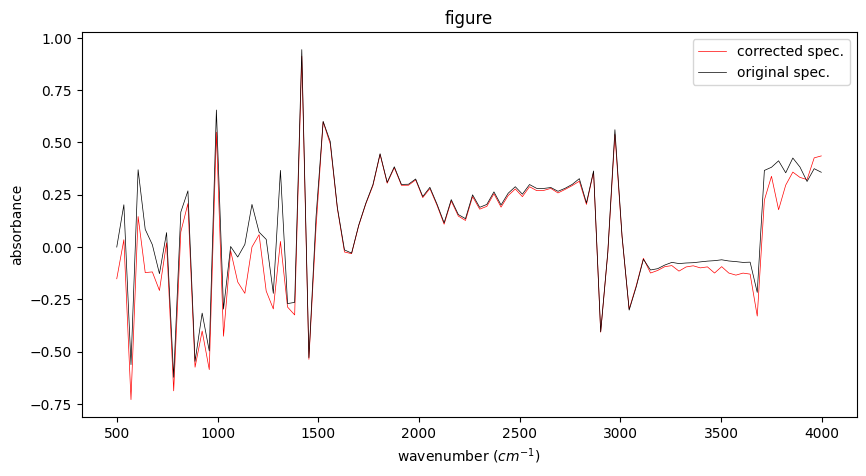

In [99]:
#Viewing Subtracted Spectrum and Plotting the Difference
hydrogenase_sub_wv[0][0].sub_spectrum.size
hydrogenase_sub_wv[1] == hydrogenase_sub_wv[0][0].sub_spectrum

hydrogenase_sub_wv[0][0].plot()     